In [1]:
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import SimParams, OptimizationParameters
from act.cell_model import TargetCell, ModuleParameters

random_seed = 42
num_slices_new = 10
num_slices_old = 5
cell_props = "center" # low, high, center
experiment = "blocked" # blocked, range
experiment_folder = f"output/bursterIzh_seg_{cell_props}{experiment}_sl-{num_slices_new}-{num_slices_old}/{random_seed}"
#experiment_folder = f"output/bursterIzh_seg_surfaceTest_sl-{num_slices_new}/{random_seed}"
target_folder = experiment_folder + "/target"

# module 1 is for spiking, module 2 for bursting, final for refining all channels
module_1_folder = experiment_folder + "/module_1"
module_2_folder = experiment_folder + "/module_2"
module_final_folder = experiment_folder + "/module_final"
print(module_final_folder)

sim_par= SimParams(
            h_v_init=-67.0,  # Consistent with nrngui settings
            h_tstop=500,     # Simulation time in ms
            h_dt=0.1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI_type="constant",
            CI_amps=[0.1,0.3,0.5],   # Current injection amplitude
            CI_dur=300,      # Duration of current injection
            CI_delay=100,     # Delay before current injection
            set_g_to=[]
        )

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


output/bursterIzh_seg_centerblocked_sl-10-5/42/module_final


In [2]:
# Get the final predicted g data file
import json

# Open and read the JSON file
with open(f"{module_final_folder}/results/saved_metrics.json", 'r') as file:
    data = json.load(file)

# Access a value using a key
final_predicted_g_data_file = data.get("predicted_g_data_file")

print(final_predicted_g_data_file)

/home/mwsrgf/proj/ACT/output/bursterIzh_seg_centerblocked_sl-10-5/42/module_final/prediction_eval0/combined_out.npy


In [3]:
from act import ACTPlot
ACTPlot.plot_v_comparison(
    final_predicted_g_data_file, 
    module_final_folder, 
    sim_par["CI_amps"],
    sim_par["h_dt"]
    )

ACTPlot.plot_fi_comparison(
    module_final_folder, 
    sim_par["CI_amps"]
    )

In [4]:
from act.Metrics import Metrics

metrics = Metrics()

mean, stdev = metrics.save_interspike_interval_comparison(
    module_final_folder,
    final_predicted_g_data_file,
    sim_par["CI_amps"], 
    sim_par["h_dt"],
    first_n_spikes=5,
    save_file=f"{module_final_folder}/results/saved_metrics.json"
)

# HighRange
#actual_g={"gbar_na3": 0.065, "gkdrbar_kdr": 0.043,"gbar_nap": 0.00055,"gmbar_im": 0.0053, "glbar_leak": 4.5e-5},
# CenterRange
#actual_g={"gbar_na3": 0.05, "gkdrbar_kdr": 0.03,"gbar_nap": 0.0004,"gmbar_im": 0.0038, "glbar_leak": 3.6e-5},
# LowRange
#actual_g={"gbar_na3": 0.035, "gkdrbar_kdr": 0.017,"gbar_nap": 0.00025,"gmbar_im": 0.0023, "glbar_leak": 2.7e-5},
if cell_props == "low":
    actual_g={"gbar_na3": 0.035, "gkdrbar_kdr": 0.017,"gbar_nap": 0.00025,"gmbar_im": 0.0023, "glbar_leak": 2.7e-5}
elif cell_props == "center":
    actual_g={"gbar_na3": 0.05, "gkdrbar_kdr": 0.03,"gbar_nap": 0.0004,"gmbar_im": 0.0038, "glbar_leak": 3.6e-5}
elif cell_props == "high":
    actual_g={"gbar_na3": 0.065, "gkdrbar_kdr": 0.043,"gbar_nap": 0.00055,"gmbar_im": 0.0053, "glbar_leak": 4.5e-5} 
    
metrics.save_prediction_g_mae(
    actual_g=actual_g,
    save_file=f"{module_final_folder}/results/saved_metrics.json"
)

metrics.save_feature_mae(
    module_final_folder,
    final_predicted_g_data_file,
    ["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
    sim_par["h_dt"],
    first_n_spikes=5,
    save_file=f"{module_final_folder}/results/saved_metrics.json"
)


Interspike times (Target): [[2.61e+01 2.18e+02 1.00e+06 1.00e+06]
 [1.97e+01 2.32e+01 1.00e+06 1.00e+06]
 [1.69e+01 1.81e+01 2.61e+01 1.00e+06]]
Interspike times (Prediction): [[2.900e+01 2.251e+02 1.000e+06 1.000e+06]
 [2.040e+01 2.380e+01 1.000e+06 1.000e+06]
 [1.730e+01 1.820e+01 2.320e+01 1.992e+02]]
MAE for each I injection: [2.500000000000014, 0.32500000000000284, 249951.05000000002]
Mean interspike-interval MAE: 83317.95833333334
Standard Deviation interspike-interval MAE: 117827.38909092532
MAE of final g prediction: 0.0031147645841485645
MAE of summary features for final prediction: 47607.15613396532


Smallest MAE values (gbar_na3, gkdrbar_kdr, Summary Stats MAE): 
[[0.04743175 0.02264289 0.45237208]
 [0.04412256 0.02264289 0.47140266]
 [0.04412256 0.02116618 0.51859096]
 [0.04081337 0.02264289 0.54233819]
 [0.04081337 0.02116618 0.5723717 ]
 [0.04081337 0.01968947 0.60673392]]


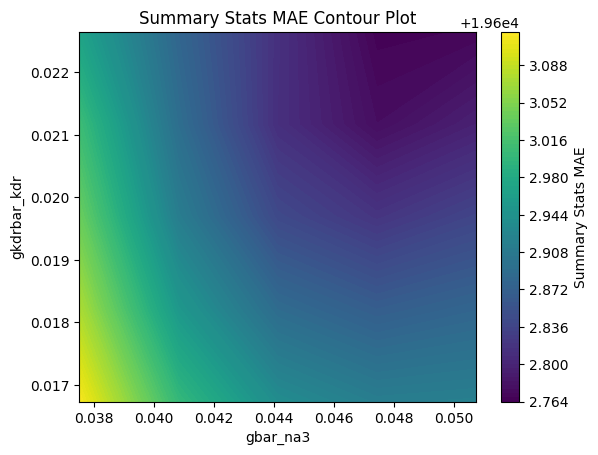

Smallest MAE values (gbar_na3, gbar_nap, Summary Stats MAE): 
[[4.74317520e-02 3.02844444e-04 4.52372077e-01]
 [4.41225600e-02 3.02844444e-04 4.71402665e-01]
 [4.41225600e-02 3.02844444e-04 5.18590961e-01]
 [4.08133680e-02 3.02844444e-04 5.42338188e-01]
 [4.08133680e-02 3.02844444e-04 5.72371697e-01]
 [4.08133680e-02 3.02844444e-04 6.06733918e-01]]


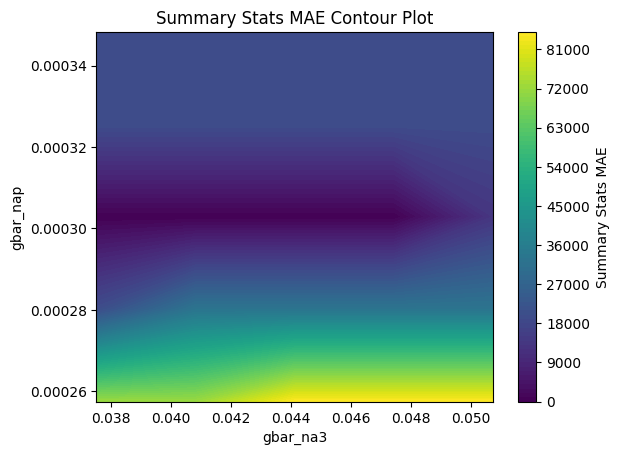

Smallest MAE values (gbar_na3, gmbar_im, Summary Stats MAE): 
[[0.04743175 0.00307939 0.45237208]
 [0.04412256 0.00307939 0.47140266]
 [0.04412256 0.00307939 0.51859096]
 [0.04081337 0.00307939 0.54233819]
 [0.04081337 0.00307939 0.5723717 ]
 [0.04081337 0.00307939 0.60673392]]


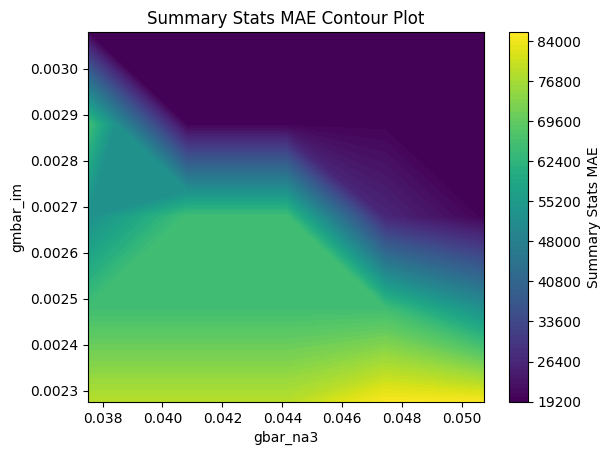

In [5]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_feature_mae_contour_plot(
        module_final_folder,
        sim_par["CI_amps"],
        sim_par["CI_delay"],
        sim_par["h_dt"],
        index1=0,
        index2=i+1,
        g_names=g_names,
        train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
        threshold=0,
        first_n_spikes=20,
        num_levels=100,
        results_filename=f"{module_final_folder}/results/Feature_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

Smallest FI MAE values (gbar_na3, gkdrbar_kdr, FI MAE): 
[[0.03750418 0.01673605 0.        ]
 [0.04081337 0.01673605 0.        ]
 [0.03750418 0.02264289 0.        ]
 [0.03750418 0.02116618 0.        ]
 [0.04081337 0.01968947 0.        ]
 [0.04743175 0.01673605 0.        ]]


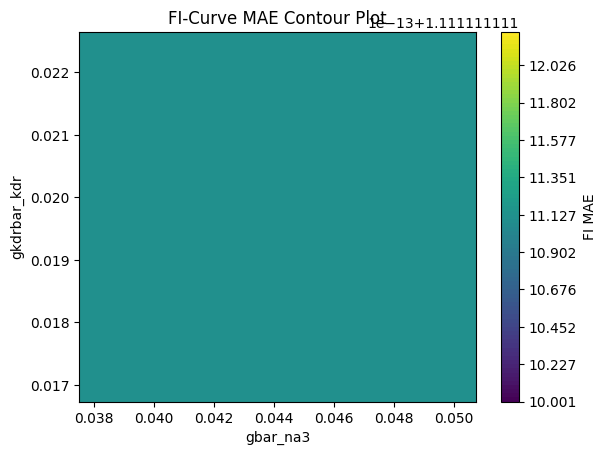

Smallest FI MAE values (gbar_na3, gbar_nap, FI MAE): 
[[0.03750418 0.00030284 0.        ]
 [0.04081337 0.00030284 0.        ]
 [0.03750418 0.00030284 0.        ]
 [0.03750418 0.00030284 0.        ]
 [0.04081337 0.00030284 0.        ]
 [0.04743175 0.00030284 0.        ]]


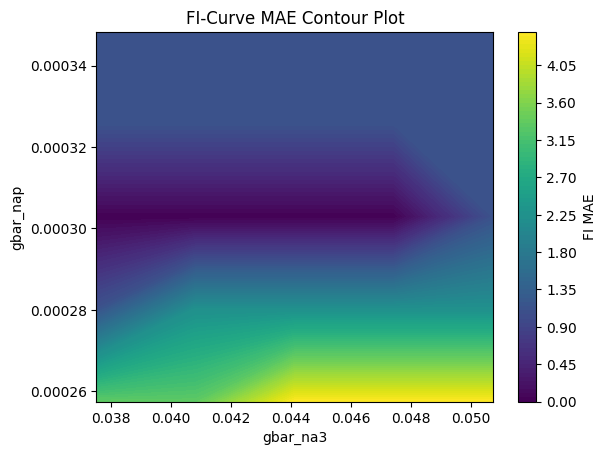

Smallest FI MAE values (gbar_na3, gmbar_im, FI MAE): 
[[0.03750418 0.00307939 0.        ]
 [0.04081337 0.00307939 0.        ]
 [0.03750418 0.00307939 0.        ]
 [0.03750418 0.00307939 0.        ]
 [0.04081337 0.00307939 0.        ]
 [0.04743175 0.00307939 0.        ]]


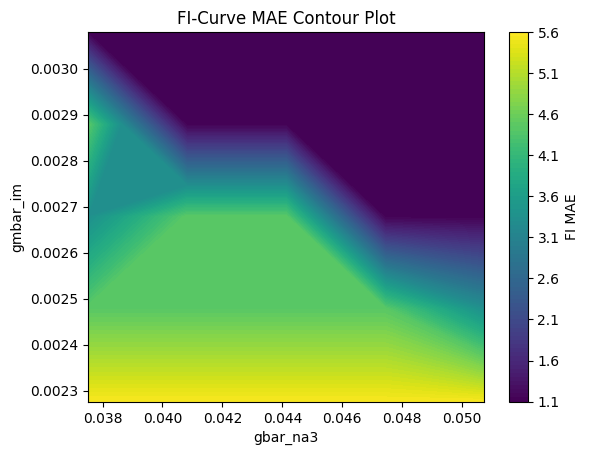

In [6]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_fi_mae_contour_plot(
        module_final_folder,
        sim_par["CI_amps"], 
        sim_par["CI_dur"],
        sim_par["CI_delay"],
        sim_par["h_dt"],
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_final_folder}/results/FI_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

Smallest MAE values (gbar_na3, gkdrbar_kdr, V MAE): 
[[0.05074094 0.02116618 1.3552104 ]
 [0.05074094 0.01968947 1.45604358]
 [0.05074094 0.02264289 1.47205198]
 [0.04743175 0.01968947 1.51411007]
 [0.05074094 0.01821276 1.52373439]
 [0.05074094 0.01968947 1.5626804 ]]


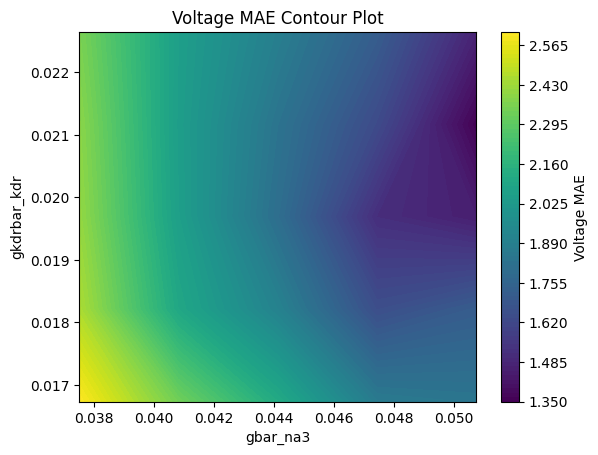

Smallest MAE values (gbar_na3, gbar_nap, V MAE): 
[[5.07409440e-02 3.48271111e-04 1.35521040e+00]
 [5.07409440e-02 3.48271111e-04 1.45604358e+00]
 [5.07409440e-02 3.48271111e-04 1.47205198e+00]
 [4.74317520e-02 3.48271111e-04 1.51411007e+00]
 [5.07409440e-02 3.25557778e-04 1.52373439e+00]
 [5.07409440e-02 3.25557778e-04 1.56268040e+00]]


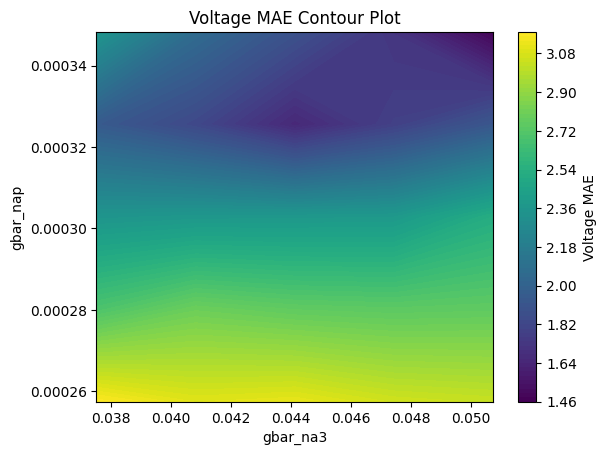

Smallest MAE values (gbar_na3, gmbar_im, V MAE): 
[[0.05074094 0.00307939 1.3552104 ]
 [0.05074094 0.00307939 1.45604358]
 [0.05074094 0.00307939 1.47205198]
 [0.04743175 0.00307939 1.51411007]
 [0.05074094 0.00287856 1.52373439]
 [0.05074094 0.00287856 1.5626804 ]]


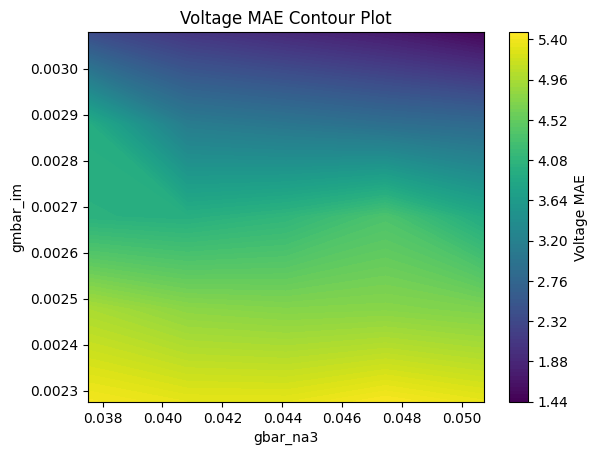

In [7]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_v_mae_contour_plot(
        module_final_folder,
        sim_par["CI_amps"], 
        sim_par["CI_delay"],
        sim_par["h_dt"],
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_final_folder}/results/Voltage_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )